# Imports

In [23]:
# Reload modules before executing code
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *

#######################################
config_file = 'config_process_concept.yml'
# config_file = 'config_process_hybrid_mlp35x5euler.yml'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/ame805/torchHydroNodes/src/scripts/utils.py:244: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Frequency')


# Load config and create folders

In [24]:
cfg = load_config(Path(config_file))

results_folder = Path(cfg['results_folder'])
periods = cfg['periods']
metrics = cfg['metrics']
threshold_dict = cfg['threshold_dict']
metrics_path, results_path = load_results_path(results_folder, periods)
plots_folder = Path(cfg['plots_folder'])
graph_title = cfg['graph_title']

In [25]:
threshold_dict

{'nse': [0.0, 'greater'], 'kge': [0.0, 'greater'], 'fhv': [500, 'less']}

In [26]:
# display(
#     results_folder,
#     results_path,
#     plots_folder,
#     periods,
#     metrics,
#     threshold_dict
# )

# Plot results

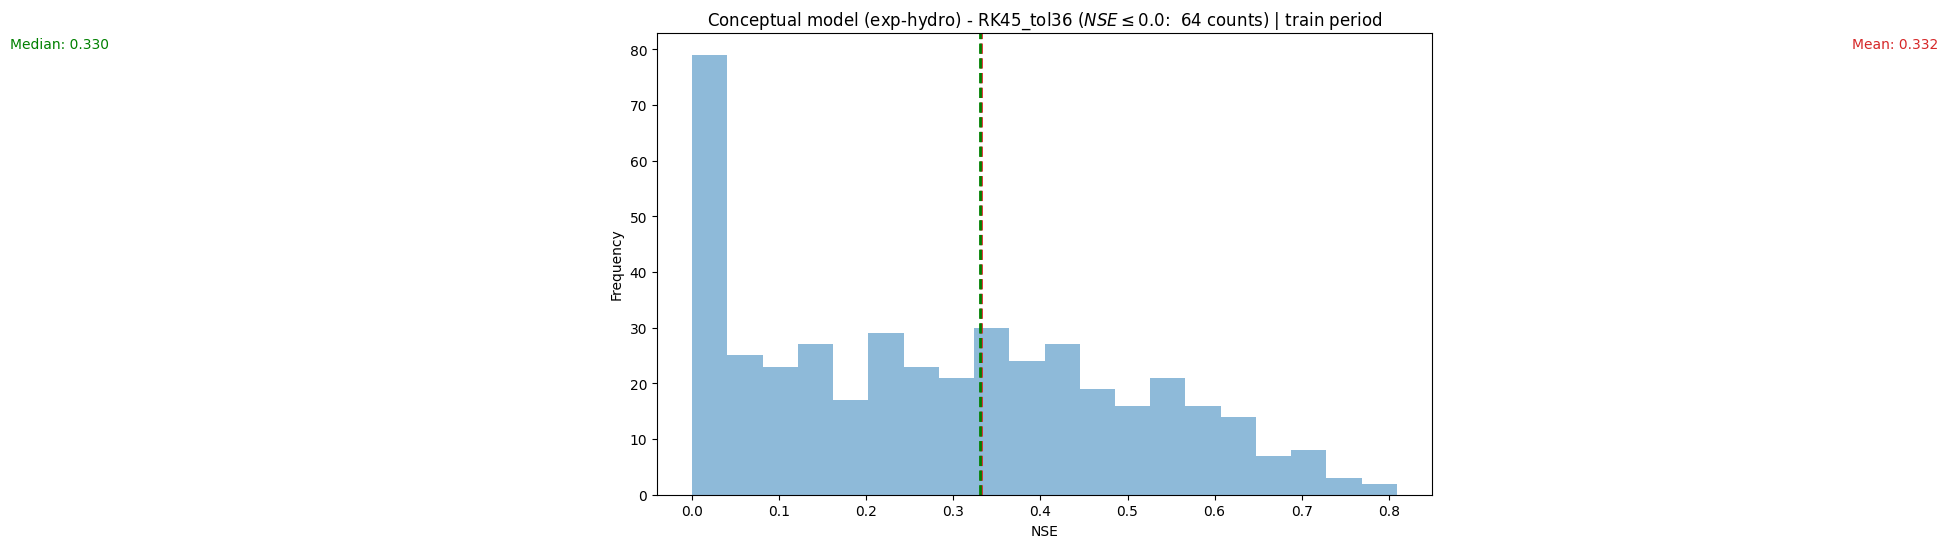

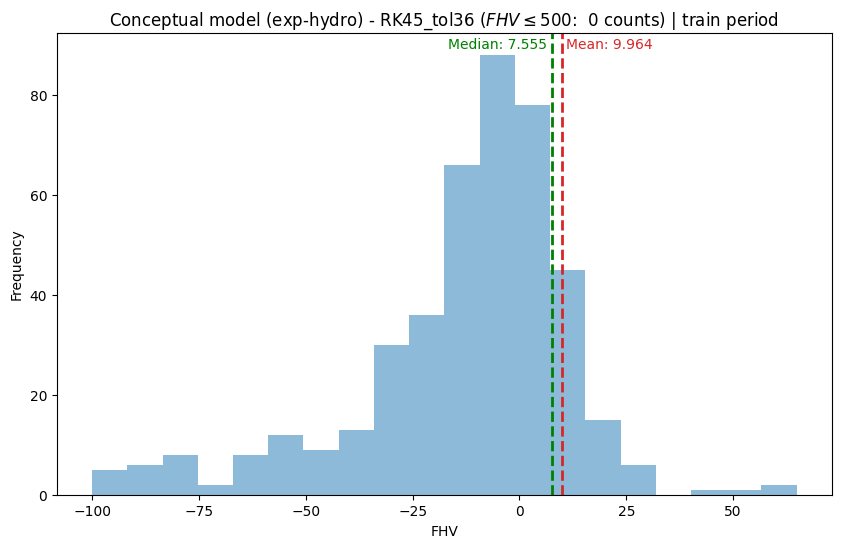

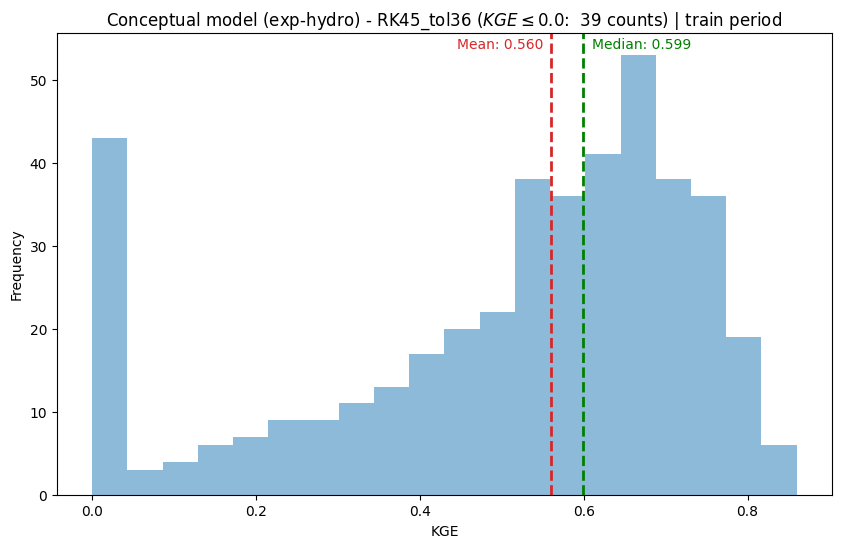

/home/ame805/torchHydroNodes/src/utils/metrics.py:240: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = stats.pearsonr(y_true, y_pred)


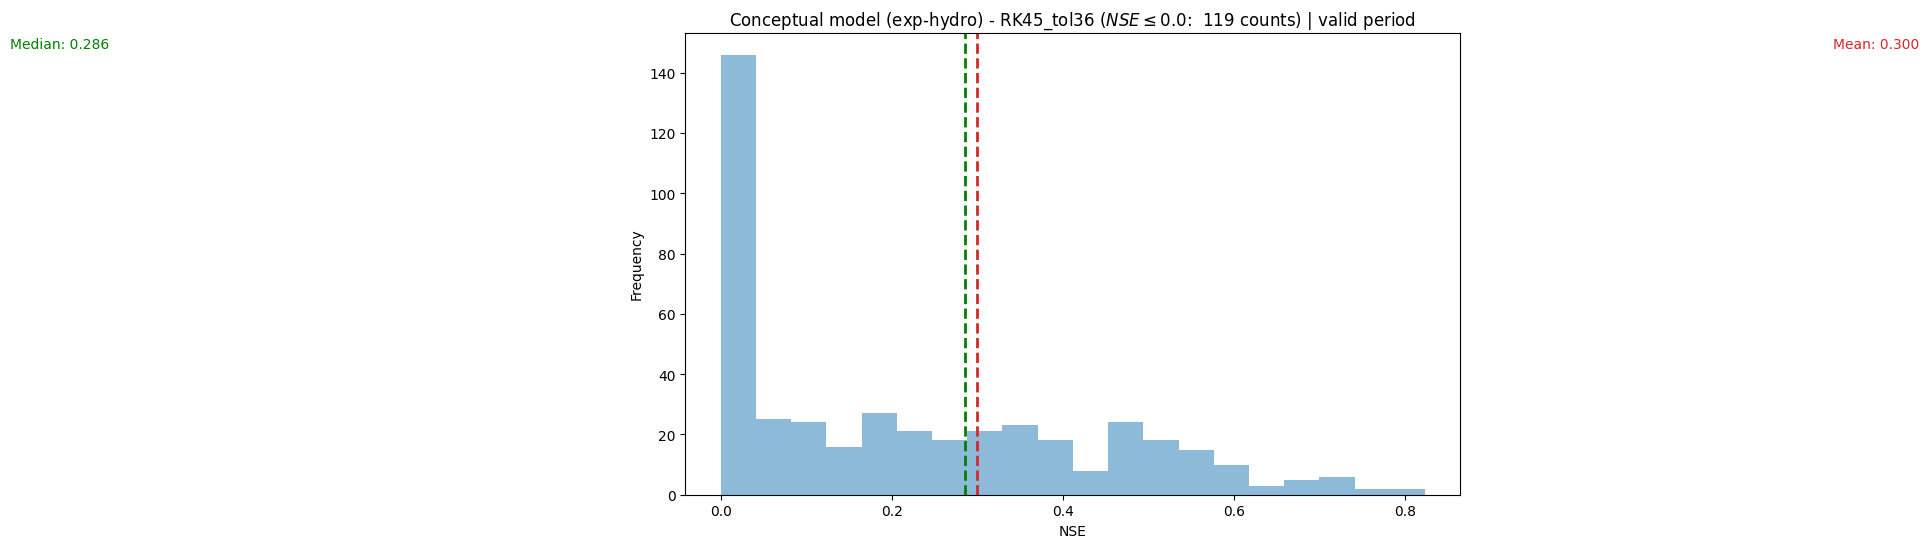

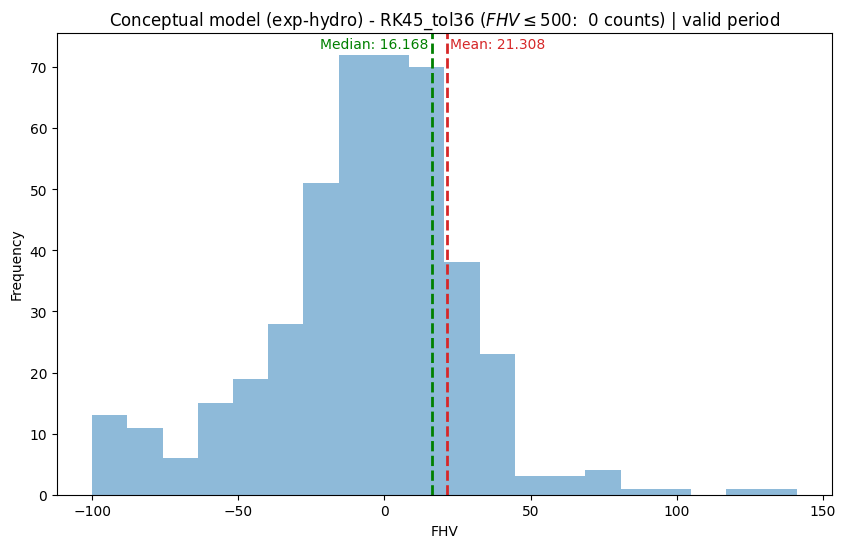

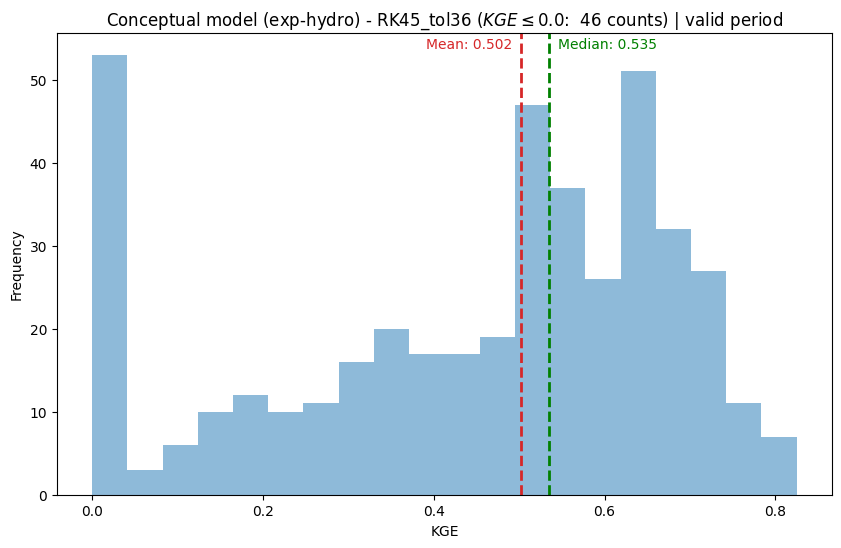

In [27]:
# Assuming results_path, periods, metrics, threshold_dict, and plots_folder are defined
for period in periods:

    metric_file_path = metrics_path / f'metrics_{period}.csv'

    # Check if the file exists and is not empty
    if metric_file_path.exists() and metric_file_path.stat().st_size <= 1:
        metric_file_path.unlink()  # Deletes the file

    # Check if the file exists and is not empty
    if not metric_file_path.exists():
        df_period = metrics_from_julia_results(metrics, period, results_path, metrics_path)
    else:
        df_period = pd.read_csv(metrics_path / f'metrics_{period}.csv')

    for metric in metrics:
        
        # Plot the histograms
        plot_metric_histogram(df_period, metric, threshold_dict, graph_title, period, plots_folder)